In [18]:
# import
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import importlib

In [19]:
from utils import get_stock_data
import trade_decision as td
importlib.reload(td)

<module 'trade_decision' from '/Users/zhijiezh/Files/Projects/stock_notifier/trade_decision.py'>

[*********************100%***********************]  1 of 1 completed

Analyzing VOO...
short_window:  5
long_window:  60
rsi_buy_signal:  45
rsi_sell_signal:  70
rsi_window:  60
Buy signals for VOO:
 Price            Close        High         Low        Open    Volume  \
Ticker             VOO         VOO         VOO         VOO       VOO   
Date                                                                   
2023-09-26  384.601746  388.126944  383.818345  387.500253   5734700   
2023-10-03  380.790405  385.253040  379.453559  383.926033   6886700   
2023-10-11  394.099792  394.257070  391.209876  393.451033   4181800   
2023-10-12  391.730774  394.954894  389.450320  394.640369   3872900   
2023-10-13  389.666595  394.129230  388.231446  392.998828   3769800   
2023-10-18  388.487030  392.998831  387.504066  392.094521   7329300   
2023-10-19  385.194122  390.826517  384.476578  389.224281   6708900   
2023-10-20  380.397217  385.144950  380.249778  384.712443   7546900   
2023-10-26  372.543365  376.868401  371.707840  376.111530   6959400   
2023-1

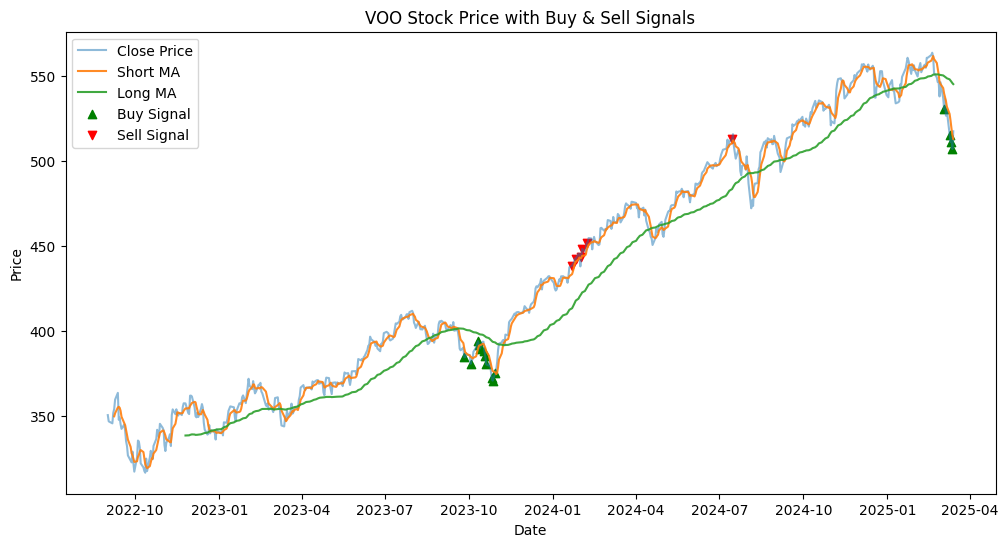

[*********************100%***********************]  1 of 1 completed

Analyzing NVDA...
short_window:  5
long_window:  60
rsi_buy_signal:  45
rsi_sell_signal:  70
rsi_window:  60
Buy signals for NVDA:
 Price            Close        High         Low        Open     Volume  \
Ticker            NVDA        NVDA        NVDA        NVDA       NVDA   
Date                                                                    
2025-01-27  118.409103  128.388181  116.689260  124.788521  818830900   
2025-03-03  114.049507  123.688620  112.269672  123.498643  411381400   
2025-03-04  115.979332  119.299026  110.099875  110.639827  398163300   
2025-03-10  106.970161  111.839709  105.450297  109.889891  366487400   
2025-03-11  108.750000  112.229676  104.760361  106.980159  354865700   

Price      Volume_Series    Short_MA     Long_MA        RSI    Volume_MA  
Ticker                                                                    
Date                                                                      
2025-01-27     818830900  139.219196  139.353446  44.42458

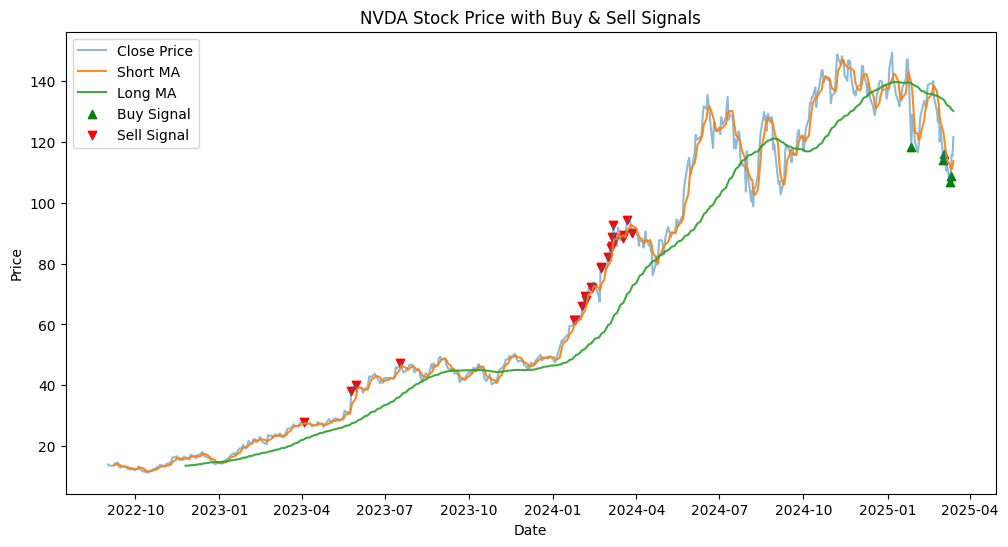

In [20]:

# # Define a list of stock tickers
tickers = ['VOO', 'NVDA']
# tickers = ['BABA','PDD','ARM','BTC-USD', 'ETH-USD','NVDA','SMCI','AMC','META','SAVE','LLY', 'BAC','SHOP']
# tickers = ['META', 'GOOG', 'AAPL', 'NVDA', 'BTC-USD','PDD','AMC']
start_date = '2022-09-01'
end_date = '2025-03-17'

# Monitor each stock
# Monitor each stock
for ticker in tickers:
    print(f"Analyzing {ticker}...")
    stock = get_stock_data(ticker, start_date, end_date)
    buy, sell = td.decide_trade(stock, short_window=td.SHORT_WINDOW, long_window=td.LONG_WINDOW, rsi_buy_signal=td.RSI_BUY_SIGNAL, rsi_sell_signal=td.RSI_SELL_SIGNAL, rsi_window=td.RSI_WINDOW )
    print(f"Buy signals for {ticker}:\n", stock[buy])
    print(f"Sell signals for {ticker}:\n", stock[sell])

    # Optional: Plotting
    plt.figure(figsize=(12,6))
    plt.plot(stock['Close'], label='Close Price', alpha=0.5)
    plt.plot(stock['Short_MA'], label='Short MA', alpha=0.9)
    plt.plot(stock['Long_MA'], label='Long MA', alpha=0.9)
    plt.scatter(stock.index[buy], stock['Close'][buy], marker='^', color='g', label='Buy Signal', alpha=1)
    plt.scatter(stock.index[sell], stock['Close'][sell], marker='v', color='r', label='Sell Signal', alpha=1)
    plt.title(f'{ticker} Stock Price with Buy & Sell Signals')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend(loc='best')
    plt.show()


In [ ]:

# # Example usage
# for ticker in tickers:
#   stock = get_stock_data(ticker, start_date, end_date)
#   buy, sell = decide_trade(stock, short_window=5, long_window=20, rsi_buy_signal= 30, rsi_sell_signal=90)
#   trades, total_return, return_percentage = backtest_strategy(stock, buy, sell,30,0.1)
#   print(f"#######################{ticker}##########################")
#   print(f"Trades: {trades}")
#   print(f"Total Return: ${total_return:.2f}")
#   print(f"Return Percentage: {return_percentage:.2f}%")
#   print(f"Hold Return Percentage: {(stock['Close'][len(stock)-1]-stock['Close'][0])/stock['Close'][0]*100:.2f}%")